<a href="https://colab.research.google.com/github/Joy-Onuoha21/Machine-Learning-Project/blob/main_Update/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The silhouette coefficient (KMeans) for k =2 is: 0.12547800110646057
The silhouette coefficient (KMeans) for k =3 is: 0.12961718556640645
The silhouette coefficient (KMeans) for k =4 is: 0.08937633765092734
The silhouette coefficient (KMeans) for k =5 is: 0.09135863721512452
The silhouette coefficient (KMeans) for k =6 is: 0.09099981846553758
The silhouette coefficient (KMeans) for k =7 is: 0.08931922975080987
The silhouette coefficient (KMeans) for k =8 is: 0.09727194788798106
The silhouette coefficient (KMeans) for k =9 is: 0.10438337481715934


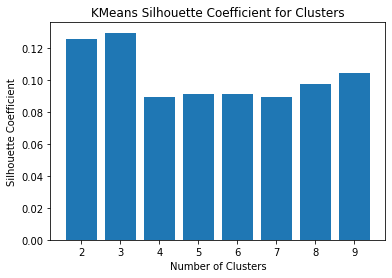

The silhouette coefficient (KMeansp) for k =2 is: 0.12547800110646057
The silhouette coefficient (KMeansp) for k =3 is: 0.1314070917565698
The silhouette coefficient (KMeansp) for k =4 is: 0.08321369262163705
The silhouette coefficient (KMeansp) for k =5 is: 0.09503524725791877
The silhouette coefficient (KMeansp) for k =6 is: 0.09548130631270936
The silhouette coefficient (KMeansp) for k =7 is: 0.09558431759989135
The silhouette coefficient (KMeansp) for k =8 is: 0.08114539380504036
The silhouette coefficient (KMeansp) for k =9 is: 0.09296043798855973


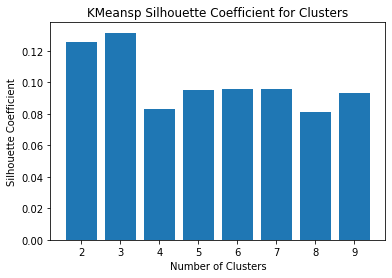

The silhouette coefficient (BisectingHierKMeans) for k =2 is: 0.12547800110646057
The silhouette coefficient (BisectingHierKMeans) for k =3 is: 0.12330523321484652
The silhouette coefficient (BisectingHierKMeans) for k =4 is: 0.1295683603128523
The silhouette coefficient (BisectingHierKMeans) for k =5 is: 0.12253196648698043
The silhouette coefficient (BisectingHierKMeans) for k =6 is: 0.12102947637119335
The silhouette coefficient (BisectingHierKMeans) for k =7 is: 0.12476649440207652
The silhouette coefficient (BisectingHierKMeans) for k =8 is: 0.11707568082499609
The silhouette coefficient (BisectingHierKMeans) for k =9 is: 0.1194295655910764


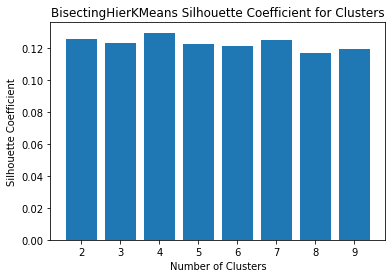

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from copy import deepcopy


# load dataset to pandas dataFrame

data= pd.read_csv("dataset", delimiter=" ", header= None)
data
dataset = data.iloc[:, 1:]


def gaussian_normalize(dataset):
    # Calculate mean and standard deviation of dataset
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)

    # Normalize dataset using Gaussian normalization
    dataset = (dataset - mu) / sigma
    return dataset

dataset=gaussian_normalize(dataset)

np.random.seed(42)


# Euclidean Distance Function
def distance(X,Y):
    return np.linalg.norm(X-Y)

# K Means Algorithm
def k_MeansClustering(dataset, k):
    # Convert dataframe to numpy array
    dataset = dataset.to_numpy()

    # Create k random cluster representatives from the dataset
    representatives_indices = np.random.choice(dataset.shape[0], size=k, replace=False)
    representatives = dataset[representatives_indices]

    # To store the value of centroids when it updates
    old_representative = np.zeros(representatives.shape)

    #Create an array for cluster assignments
    clusters_labels = np.zeros(dataset.shape[0], dtype=int)

    # Distances to each centroid
    distances = np.zeros(k)

    while not np.array_equal(representatives, old_representative):
        # Repeat Steps until convergence:
        # Assign to the closest centroid
        for i in range(dataset.shape[0]):
            for j in range(k):
                distances[j] = distance(dataset[i], representatives[j])
            clusters_labels[i] = np.argmin(distances)

        # Update centroids
        old_representative = np.copy(representatives)

        # Optimization phase
        for i in range(k):
            points = dataset[clusters_labels == i]
            representatives[i] = np.mean(points, axis=0)

    return clusters_labels


def k_Meanspp(dataset, k):
    # Convert dataframe to numpy array
    dataset = dataset.to_numpy()

    # Initialize first representative randomly
    representatives = np.zeros((k, dataset.shape[1]), dtype=np.float64)
    representative1_index = np.random.choice(dataset.shape[0], size=1)
    representatives[0] = dataset[representative1_index]

    # Initialize remaining representatives using k-means++ initialization
    for i in range(1, k):
        distances = np.empty((dataset.shape[0], i))
        for j in range(i):
            distances[:, j] = np.apply_along_axis(distance, 1, dataset, representatives[j])
        min_distances = np.min(distances, axis=1)
        probs = min_distances / np.sum(min_distances)
        cumprobs = np.cumsum(probs)
        r = np.random.random()
        index = np.searchsorted(cumprobs, r)
        representatives[i:i+1] = dataset[index]

    # To store the value of centroids when it updates
    old_representative = np.zeros(representatives.shape)

    #Create an array for cluster assignments
    clusters_labels = np.zeros((dataset.shape[0]))

    # Distances to each centroid
    distances = np.zeros(k)

    while not np.array_equal(representatives, old_representative):
        # Repeat Steps until convergence:
        # Assign to the closest centroid
        for i in range(len(dataset)):
            for j in range(k):
                distances[j] = distance(dataset[i], representatives[j])
            clusters_labels[i] = np.argmin(distances)

        # Update centroids
        old_representative = deepcopy(representatives)

        # Optimization Phase
        for i in range(k):
            points = []
            for j in range(dataset.shape[0]):
                if clusters_labels[j] == i:
                    points.append(dataset[j])
            representatives[i] = np.mean(points, axis=0)
    return clusters_labels

 # Bisecting K Means Algorithm

def kmeans_single(dataset):

    # Convert dataframe to numpy array
    dataset = dataset.to_numpy()

    # Initialize with two random data points
    c1, c2 = dataset[np.random.choice(dataset.shape[0], 2, replace=False)]

    while True:
        # Assign points to clusters
        cluster_labels = np.where(np.linalg.norm(dataset - c1, axis=1) < np.linalg.norm(dataset - c2, axis=1), 0, 1)
        # Update centroids
        new_c1, new_c2 = np.mean(dataset[cluster_labels == 0], axis=0), np.mean(dataset[cluster_labels == 1], axis=0)
        # If centroids haven't moved, exit loop
        if np.array_equal(c1, new_c1) and np.array_equal(c2, new_c2):
            break
        else:
            c1, c2 = new_c1, new_c2

    return cluster_labels

def bisecting_kmeans(dataset, k):
    # Initialize  tree with a single cluster containing all the data
    clusters = [dataset]
    while len(clusters) < k:
        # Find  cluster with the largest sum of squared distances
        max_cluster_index = max(range(len(clusters)), key=lambda i: np.sum(np.var(clusters[i], axis=0)))
        # Bisect  cluster into two subclusters using k-means
        subcluster_labels = kmeans_single(clusters[max_cluster_index])
        subclusters = [clusters[max_cluster_index][subcluster_labels == 0],
                       clusters[max_cluster_index][subcluster_labels == 1]]
        # Replace  current cluster with the two subclusters
        clusters.pop(max_cluster_index)
        clusters.extend(subclusters)

    # Assign final cluster labels based on the original dataset
    cluster_labels = np.zeros(len(dataset))
    for i, cluster in enumerate(clusters):
        cluster_labels[np.isin(dataset, cluster).all(axis=1)] = i

    return cluster_labels


def SilhouetteCoefficient(dataset, cluster_labels):
    n = len(dataset)
    dataset = dataset.to_numpy()

    # Calculate distance matrix
    distmat = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distmat[i, j] = distance(dataset[i], dataset[j])

    # Compute Silhouette Coefficient for each data point
    sil_coeffs = np.zeros(n)
    for i in range(n):
        label_i = cluster_labels[i]
        A_i = np.mean(distmat[i, cluster_labels == label_i])

        B_i = np.inf
        for j in range(n):
            if cluster_labels[j] != label_i:
                B_ij = np.mean(distmat[i, cluster_labels == cluster_labels[j]])
                if B_ij < B_i:
                    B_i = B_ij

        sil_coeffs[i] = (B_i - A_i) / max(A_i, B_i)

    # Compute average Silhouette Coefficient
    score = np.mean(sil_coeffs)

    return score

def silhouette(dataset):
    k = range(2, 10)
    KMean = plotSilhouette("KMeans", dataset, k)
    KMeansp = plotSilhouette("KMeansp", dataset, k)
    BisectingKMean = plotSilhouette("BisectingHierKMeans", dataset, k)

    return KMean, KMeansp, BisectingKMean


def plotSilhouette(name, dataset, k):
    scores = []
    for i in k:
        if name == "KMeans":
            cluster_label = k_MeansClustering(dataset, i)
        elif name == "KMeansp":
            cluster_label = k_Meanspp(dataset, i)
        elif name == "BisectingHierKMeans":
            cluster_label = bisecting_kmeans(dataset, i)

        SilhouetteCoef = SilhouetteCoefficient(dataset, cluster_label)
        print(f"The silhouette coefficient ({name}) for k ={i} is: {SilhouetteCoef}")
        scores.append(SilhouetteCoef)

    # Plot the silhouette coefficients as a bar chart
    fig, ax = plt.subplots()
    ax.bar(k, scores)
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Silhouette Coefficient')
    ax.set_title(f'{name} Silhouette Coefficient for Clusters')
    plt.show()

    return scores

KMean, KMeansp, BisectingKMean = silhouette(dataset)


